In [1]:
import serial
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.signal import find_peaks

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [24]:
line = serial.Serial('/dev/cu.usbmodem141301')
window = read_window()
line.close()

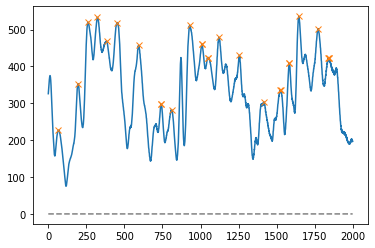

In [25]:
x = window
peaks, params = find_peaks(x, height = 0.25 * np.mean(x), width = 20)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

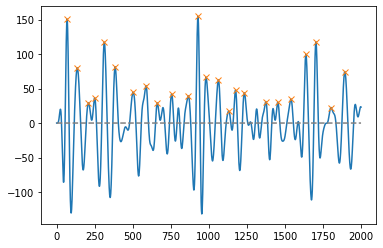

In [30]:
# Filter requirements.

fs = 1/ 0.005
lowcut = 2
highcut = 6

x = window
x = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
peaks, params = find_peaks(x, height = 0.25 * np.mean(x), width = 20)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [31]:
 x = x[peaks]

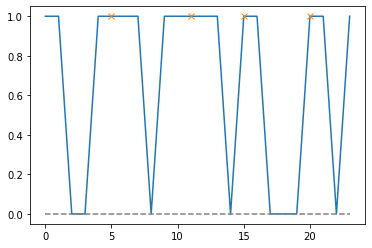

In [32]:
x[x<0.6 * np.mean(params['peak_heights'])] = 0
x[x >0.6 * np.mean(params['peak_heights'])] = 1

peaks, params = find_peaks(x, plateau_size = 2)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()


In [33]:
print(len(peaks))

4


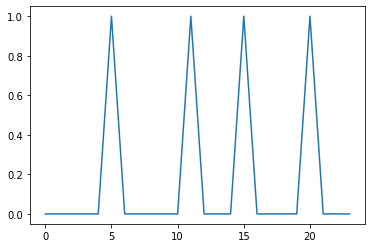

In [34]:
x[:] = 0
x[peaks] = 1
plt.plot(x)
plt.show()


In [ ]:
def read_window():
    i = 0
    window = np.empty(2000)
    while( i <2000):
        window[i] = line.readline()
        i += 1
    return window